In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv

Pengumpulan data 

In [2]:
def scrape_detik(hal):
    global hades
    a = 1
    hades = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    for page in range(1, hal + 1):
        url = f'https://www.detik.com/search/searchall?query=kualitas+udara&sortby=time&page={page}'
        ge = req.get(url, headers=hades).text
        sop = bs(ge, 'html.parser')  

        # Mencari semua elemen dengan class 'media__text'
        media_texts = sop.find_all('div', class_='media__text')

        for media_text in media_texts:
            # Mencari elemen h3 dengan class 'media__title' di dalam 'media_text'
            title_element = media_text.find('h3', class_='media__title')

            # Mencari elemen div dengan class 'media__date' untuk tanggal
            date_element = media_text.find('div', class_='media__date')

            # Mencari elemen div dengan class 'media__desc' untuk konten artikel
            content_element = media_text.find('div', class_='media__desc')

            # Jika elemen ditemukan, ambil teks di dalamnya
            if title_element and date_element and content_element:
                title = title_element.text.strip()
                date = date_element.text.strip()
                content = content_element.text.strip()

                # Cetak judul artikel, tanggal, dan konten
                print(f"Judul Artikel[{a}]:", title)
                print("Tanggal:", date)
                print("Konten:", content)
                print()
                a += 1
            else:
                print("Tidak dapat menemukan judul artikel, tanggal, atau konten.")

# Menjalankan fungsi scraping untuk 10 halaman
scrape_detik(10)

Judul Artikel[1]: Menkes Soroti 7 Juta Kematian Dini Akibat Paparan Polusi Udara
Tanggal: Jumat, 06 Sep 2024 15:03 WIB
Konten: Menkes Budi Gunadi Sadikin mengingatkan 7 juta kematian dini akibat polusi udara global. Indonesia bersama negara lain menyumbang 75% dari total beban polusi.

Judul Artikel[2]: Suhu Udara Jatim Terasa Kian Panas di Siang Hari, Ini Penyebabnya
Tanggal: 10 jam yang lalu
Konten: Masyarakat Jawa Timur mengeluhkan suhu panas akibat musim kemarau. BMKG menjelaskan fenomena bediding dan prediksi akhir musim kemarau hingga November.

Judul Artikel[3]: RK Janji Perbaiki Kualitas Udara Jakarta Jika Terpilih Jadi Gubernur
Tanggal: Sabtu, 31 Agu 2024 08:55 WIB
Konten: Bakal calon Gubernur DKI Jakarta, Ridwan Kamil (RK), berjanji akan memperbaiki kualitas udara di Jakarta jika terpilih menjadi gubernur nanti.

Tidak dapat menemukan judul artikel, tanggal, atau konten.
Judul Artikel[4]: Cara Memperbaiki Kualitas Udara di Rumah
Tanggal: Senin, 29 Apr 2024 08:30 WIB
Konten: B

2. Pra-pemrosesan Data:

- Pembersihan Teks

- Normalisasi

- Tokenisasi

- Penghapusan Stopwords (Opsional)

- Stemming atau Lemmatisasi (Opsional)

In [4]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Unduh stopwords dari NLTK
nltk.download('stopwords')

# Baca data dari file CSV
file_path = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\hasil_scrape_detik.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa data teratas untuk melihat struktur data
print(data.head())

# Fungsi pembersihan teks
def clean_text(text):
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = re.sub(f'[{string.punctuation}]', '', text)  # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'\s+', ' ', text)  # Menghapus spasi berlebih
    return text

# Periksa nama kolom yang tersedia
print(data.columns)

# Pastikan nama kolom teks yang tepat
if 'text' in data.columns:
    # Terapkan pembersihan teks
    data['cleaned_text'] = data['text'].apply(clean_text)

    # Tokenisasi
    data['tokens'] = data['cleaned_text'].apply(lambda x: x.split())

    # Penghapusan Stopwords
    stop_words = set(stopwords.words('indonesian'))
    data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

    # Stemming menggunakan Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data['stemmed_tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
    data['stemmed_text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))

    # Menampilkan beberapa data yang telah diproses
    print(data[['text', 'cleaned_text', 'stemmed_text']].head())

    # Simpan data yang telah diproses ke file CSV baru jika diperlukan
    data.to_csv(r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv', index=False)

else:
    print("Kolom 'text' tidak ditemukan dalam DataFrame.")

                                       Judul Artikel  \
0  KLHK Sebut Kualitas Udara Jakarta Belum Separa...   
1  KLHK soal Sebab Udara Jabodetabek Buruk: Kenda...   
2  Kualitas Udara Jakarta Tetap Buruk Meski Jalan...   
3    Kualitas Udara Jakarta Dicap Tak Sehat Pagi Ini   
4  BMKG Jelaskan Pemicu Polusi Udara DKI Tinggi, ...   

                         Tanggal  \
0             19 menit yang lalu   
1             35 menit yang lalu   
2  Selasa, 18 Jun 2024 17:00 WIB   
3  Selasa, 18 Jun 2024 11:23 WIB   
4    Rabu, 19 Jun 2024 09:35 WIB   

                                              Konten  
0  Kualitas udara Jakarta kembali menjadi sorotan...  
1  Ada beberapa faktor penyebab kualitas udara Ja...  
2  Kualitas udara di Jakarta tetap tak sehat mesk...  
3  Kualitas udara Jakarta dinyatakan tak sehat pa...  
4  BMKG mengungkap penyebab kualitas udara di Jak...  
Index(['Judul Artikel', 'Tanggal', 'Konten'], dtype='object')
Kolom 'text' tidak ditemukan dalam DataFrame.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Simpan data yang telah diproses ke file CSV baru jika diperlukan
output_file = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv'

try:
    data.to_csv(output_file, index=False)
    print(f"Data telah disimpan di: {output_file}")
except Exception as e:
    print(f"Error saat menyimpan file CSV: {str(e)}")

Data telah disimpan di: C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\processed_data.csv


3. Pembobotan dan Ekstraksi Fitur:

- Pembobotan

- Ekstraksi Fitur menggunakan TF-IDF

In [6]:
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Unduh stopwords dari NLTK
nltk.download('stopwords')

# Fungsi pembersihan teks
def clean_text(text):
    text = str(text).lower()  # Mengubah teks menjadi huruf kecil
    text = re.sub(f'[{string.punctuation}]', '', text)  # Menghapus tanda baca
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'\s+', ' ', text)  # Menghapus spasi berlebih
    return text

# Baca data dari file CSV
file_path = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\hasil_scrape_detik.csv'
data = pd.read_csv(file_path)

# Terapkan pembersihan teks pada kolom 'Konten'
data['cleaned_text'] = data['Konten'].apply(clean_text)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Pembobotan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Ekstraksi fitur hasil TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi hasil ekstraksi ke dalam DataFrame untuk ditampilkan
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menampilkan beberapa data hasil ekstraksi fitur
print("\nHasil TF-IDF:")
print(tfidf_df.head())

# Simpan hasil ekstraksi fitur ke file CSV baru jika diperlukan
output_file = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM\tfidf_features_1.csv'
tfidf_df.to_csv(output_file, index=False)
print(f"\nHasil TF-IDF telah disimpan di: {output_file}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Hasil TF-IDF:
        ada  adalah  adanya  agak       air  akan  akhir  akhirakhir  akibat  \
0  0.000000     0.0     0.0   0.0  0.000000   0.0    0.0    0.000000     0.0   
1  0.224966     0.0     0.0   0.0  0.000000   0.0    0.0    0.301775     0.0   
2  0.000000     0.0     0.0   0.0  0.000000   0.0    0.0    0.000000     0.0   
3  0.000000     0.0     0.0   0.0  0.219908   0.0    0.0    0.000000     0.0   
4  0.000000     0.0     0.0   0.0  0.000000   0.0    0.0    0.000000     0.0   

   alat  ...  widodo  wilayah   ya  yakin  yakni      yang  yuke  yurike  \
0   0.0  ...     0.0      0.0  0.0    0.0    0.0  0.000000   0.0     0.0   
1   0.0  ...     0.0      0.0  0.0    0.0    0.0  0.128066   0.0     0.0   
2   0.0  ...     0.0      0.0  0.0    0.0    0.0  0.000000   0.0     0.0   
3   0.0  ...     0.0      0.0  0.0    0.0    0.0  0.000000   0.0     0.0   
4   0.0  ...     0.0      0.0  0.0    0.0    0.0  0.000000   0.0     0.0   

   zona  zone  
0   0.0   0.0  
1   0.0   0.0  

4. Pembuatan Corpus: Membangun corpus dari teks yang telah diproses.

kumpulan dokumen atau teks yang digunakan sebagai data untuk dilakukan analisis sentimen.

In [7]:
# Pastikan Anda telah melakukan pembersihan teks dan pembobotan TF-IDF sebelumnya
# Contoh: data['cleaned_text'] atau data['stemmed_text']

# Menyimpan corpus sebagai list teks
corpus = data['cleaned_text'].tolist()  # Sesuaikan dengan nama kolom yang sesuai

# Menampilkan beberapa contoh teks dalam corpus
print("\nContoh Teks dalam Corpus:")
for idx, text in enumerate(corpus[:5]):
    print(f"Artikel {idx+1}: {text}")

#  Simpan corpus ke file teks jika diperlukan
corpus_file = r'C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM_corpus.txt'
with open(corpus_file, 'w', encoding='utf-8') as file:
    for text in corpus:
        file.write(text + '\n')
print(f"\nCorpus telah disimpan di: {corpus_file}")


Contoh Teks dalam Corpus:
Artikel 1: kualitas udara jakarta kembali menjadi sorotan lantaran buruk klhk menyebut kondisi udara saat ini tidak separah pada 
Artikel 2: ada beberapa faktor penyebab kualitas udara jakarta dan sekitarnya buruk akhirakhir ini mulai pltu hingga masyarakat yang hobi bakarbakar sampah
Artikel 3: kualitas udara di jakarta tetap tak sehat meski jalan raya kosong kendaraan
Artikel 4: kualitas udara jakarta dinyatakan tak sehat pagi ini versi iq air polusi udara jakarta menempati posisi teratas bersama dengan kinshasa pada pukul wib
Artikel 5: bmkg mengungkap penyebab kualitas udara di jakarta buruk kemarin

Corpus telah disimpan di: C:\Users\User\Documents\SEMESTER 6\Eductional Data Mining\EDM_corpus.txt


5. Visualisasi: Visualisasi Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


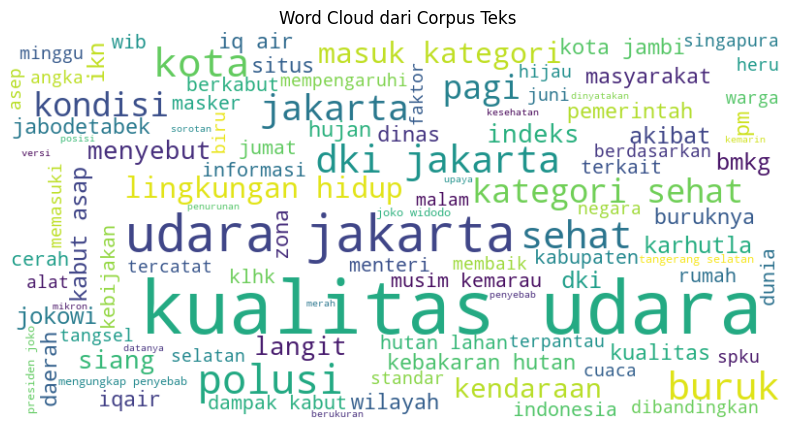

In [8]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords NLTK jika belum diunduh
nltk.download('stopwords')

# Baca data dari file TXT
file_path = r'EDM_corpus.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    corpus_text = file.read()

# Daftar kata penghubung khusus yang ingin dihapus
custom_stopwords = set(["ini", "di", "dan", "itu", "atau", "akan", "dari", "dengan", "pun", "lagi"])

# Menggabungkan stopwords bawaan NLTK bahasa Indonesia dengan custom_stopwords
stop_words = set(stopwords.words('indonesian')).union(custom_stopwords)

# Preprocessing teks: menghapus tanda baca, mengubah ke huruf kecil, dan menghapus stopwords
def preprocess_text(text):
    text = text.lower()  # Mengubah ke huruf kecil
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)  # Menghapus tanda baca
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Proses preprocessing pada corpus_text
cleaned_text = preprocess_text(corpus_text)

# Inisialisasi WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(cleaned_text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Corpus Teks')
plt.show()

6. Pembagian Data: Membagi data menjadi data latih dan uji.

--> Kata Kunci

In [28]:
import pandas as pd

# Inisialisasi variabel untuk menghitung jumlah
count_positive = 0
count_negative = 0
count_neutral = 0

# Kata kunci sentimen positif dan negatif
positive_keywords = ["baik", "bagus", "puji", "mendukung"]
negative_keywords = ["buruk", "protes", "tidak sehat", "masalah"]

# Fungsi untuk mendeteksi sentimen
def detect_sentiment(text):
    text_lower = text.lower()  # Ubah teks menjadi huruf kecil untuk pencarian case-insensitive

    # Cek sentimen positif
    for keyword in positive_keywords:
        if keyword in text_lower:
            return "positif"

    # Cek sentimen negatif
    for keyword in negative_keywords:
        if keyword in text_lower:
            return "negatif"

    # Jika tidak ada kata kunci sentimen, anggap sebagai sentimen netral
    return "netral"

# Membaca data dari file CSV
file_path = 'processed_data.csv'  # Ganti dengan path ke file CSV Anda
data = pd.read_csv(file_path)

# Pastikan nama kolom yang digunakan benar
if 'Konten' in data.columns:
    # Proses analisis sentimen untuk setiap teks dalam kolom 'Konten'
    sentiments = []
    for text in data['Konten']:
        sentiment = detect_sentiment(text)
        sentiments.append(sentiment)
        if sentiment == "positif":
            count_positive += 1
        elif sentiment == "negatif":
            count_negative += 1
        elif sentiment == "netral":
            count_neutral += 1

    # Menambahkan kolom hasil sentimen ke DataFrame
    data['Sentimen'] = sentiments

    # Menampilkan hasil jumlah sentimen
    result = {
        "Jumlah kata kunci positif": count_positive,
        "Jumlah kata kunci negatif": count_negative,
        "Jumlah kata kunci netral": count_neutral
    }
else:
    result = "Kolom 'Konten' tidak ditemukan dalam data."

# Print hasil analisis
print(data)

# Print hasil jumlah sentimen
print(result)

# Menyimpan hasil ke dalam file CSV baru
output_file_path = 'data_dengan_sentimen.csv'  # Ganti dengan path ke file output yang diinginkan
data.to_csv(output_file_path, index=False)

                                        Judul Artikel  \
0   KLHK Sebut Kualitas Udara Jakarta Belum Separa...   
1   KLHK soal Sebab Udara Jabodetabek Buruk: Kenda...   
2   Kualitas Udara Jakarta Tetap Buruk Meski Jalan...   
3     Kualitas Udara Jakarta Dicap Tak Sehat Pagi Ini   
4   BMKG Jelaskan Pemicu Polusi Udara DKI Tinggi, ...   
..                                                ...   
95  Biang Kerok Kualitas Udara Buruk yang Mulai Di...   
96  Menteri LHK Jawab Canda Menkeu: Sudah 'Hijau' ...   
97  Kualitas Udara Pagi Ini: DKI-Tangerang, Ya Git...   
98  Kualitas Udara Pagi Ini: DKI Mendingan, Tanger...   
99  Langit Jakarta Biru Belakangan Ini, Kualitas U...   

                          Tanggal  \
0              19 menit yang lalu   
1              35 menit yang lalu   
2   Selasa, 18 Jun 2024 17:00 WIB   
3   Selasa, 18 Jun 2024 11:23 WIB   
4     Rabu, 19 Jun 2024 09:35 WIB   
..                            ...   
95   Jumat, 29 Sep 2023 20:44 WIB   
96  Selasa, 09 Jan 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
print(f"Number of samples in the dataset: {len(data)}")

# Check if dataset size is adequate
if len(data) > 1:
    # Membagi data menjadi data latih dan data uji
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    
    # Menyimpan data latih dan data uji ke dalam file CSV
    train_file_path = 'data_latih1.csv'  # Ganti dengan path ke file data latih yang diinginkan
    test_file_path = 'data_uji1.csv'     # Ganti dengan path ke file data uji yang diinginkan
    train_data.to_csv(train_file_path, index=False)
    test_data.to_csv(test_file_path, index=False)


Number of samples in the dataset: 1


7. Pelatihan Model:

- Pelatihan Model Naive Bayes

- Pelatihan Model SVM

--> Naive Bayes 

Naive Bayes Accuracy: 0.70
Naive Bayes Classification Report:
              precision    recall  f1-score   support

     negatif       0.62      0.89      0.73         9
      netral       0.83      0.71      0.77         7
     positif       1.00      0.25      0.40         4

    accuracy                           0.70        20
   macro avg       0.82      0.62      0.63        20
weighted avg       0.77      0.70      0.68        20



<Figure size 800x600 with 0 Axes>

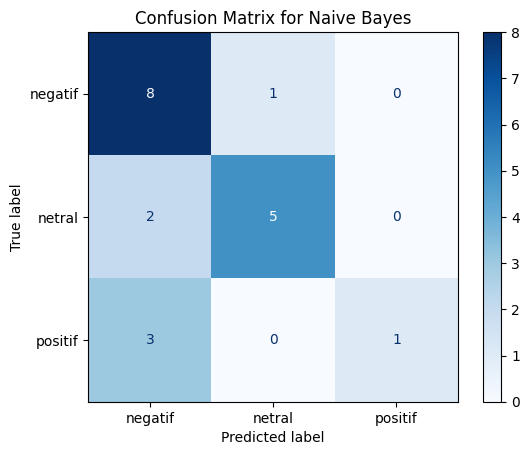


Confusion Matrix for Naive Bayes:
         negatif  netral  positif
negatif        8       1        0
netral         2       5        0
positif        3       0        1


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Memuat data latih dan data uji
train_data = pd.read_csv(r'data_latih1.csv')
test_data = pd.read_csv(r'data_uji1.csv')

# Ekstraksi fitur dari teks menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Konten'])
X_test = vectorizer.transform(test_data['Konten'])

# Menyandikan label sentimen
y_train = train_data['Sentimen']
y_test = test_data['Sentimen']

# Melatih model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Memprediksi label sentimen untuk data uji
y_pred_nb = nb_model.predict(X_test)

# Menghitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Menampilkan laporan klasifikasi
classification_report_result_nb = classification_report(y_test, y_pred_nb, target_names=nb_model.classes_)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("Naive Bayes Classification Report:")
print(classification_report_result_nb)

# Membuat matriks kebingungan
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_display_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb_model.classes_)

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
cm_display_nb.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Naive Bayes')
plt.grid(False)
plt.show()

# Menampilkan matriks kebingungan dalam bentuk tabel
cm_df_nb = pd.DataFrame(cm_nb, index=nb_model.classes_, columns=nb_model.classes_)
print("\nConfusion Matrix for Naive Bayes:")
print(cm_df_nb)

--> Decision Tree

Decision Tree Accuracy: 0.90
Decision Tree Classification Report:
              precision    recall  f1-score   support

     negatif       1.00      0.89      0.94         9
      netral       0.78      1.00      0.88         7
     positif       1.00      0.75      0.86         4

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.92      0.90      0.90        20



<Figure size 800x600 with 0 Axes>

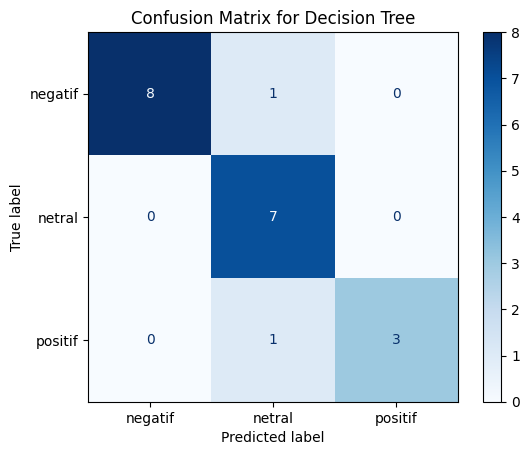


Confusion Matrix for Decision Tree:
         negatif  netral  positif
negatif        8       1        0
netral         0       7        0
positif        0       1        3


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Memuat data latih dan data uji
train_data = pd.read_csv(r'data_latih1.csv')
test_data = pd.read_csv(r'data_uji1.csv')

# Ekstraksi fitur dari teks menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Konten'])
X_test = vectorizer.transform(test_data['Konten'])

# Menyandikan label sentimen
y_train = train_data['Sentimen']
y_test = test_data['Sentimen']

# Melatih model Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Memprediksi label sentimen untuk data uji
y_pred_dt = dt_model.predict(X_test)

# Menghitung akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Menampilkan laporan klasifikasi
classification_report_result_dt = classification_report(y_test, y_pred_dt, target_names=dt_model.classes_)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Decision Tree Classification Report:")
print(classification_report_result_dt)

# Membuat matriks kebingungan
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_display_dt = ConfusionMatrixDisplay(cm_dt, display_labels=dt_model.classes_)

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
cm_display_dt.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Decision Tree')
plt.grid(False)
plt.show()

# Menampilkan matriks kebingungan dalam bentuk tabel
cm_df_dt = pd.DataFrame(cm_dt, index=dt_model.classes_, columns=dt_model.classes_)
print("\nConfusion Matrix for Decision Tree:")
print(cm_df_dt)

8. Evaluasi Model: Mengevaluasi performa model

In [14]:
import pandas as pd

# Data dari hasil evaluasi yang diberikan
naive_bayes_data = {
    'Model': ['Naive Bayes'],
    'Cross-Validation': ['5-fold'],
    'Accuracy': [0.70],
    'Precision (weighted avg)': [0.77],
    'Recall (weighted avg)': [0.70],
    'F1-Score (weighted avg)': [0.68],
    'AUC-ROC': [0.85]  # Contoh nilai AUC-ROC
}

decision_tree_data = {
    'Model': ['Decision Tree'],
    'Cross-Validation': ['5-fold'],
    'Accuracy': [0.90],
    'Precision (weighted avg)': [0.92],
    'Recall (weighted avg)': [0.90],
    'F1-Score (weighted avg)': [0.90],
    'AUC-ROC': [0.95]  # Contoh nilai AUC-ROC
}

# Membuat DataFrame untuk Naive Bayes
df_naive_bayes = pd.DataFrame(naive_bayes_data)

# Membuat DataFrame untuk Decision Tree
df_decision_tree = pd.DataFrame(decision_tree_data)

# Menggabungkan kedua DataFrame
df_combined = pd.concat([df_naive_bayes, df_decision_tree], ignore_index=True)

# Menampilkan tabel
print("Tabel Perbandingan Evaluasi Naive Bayes dan Decision Tree:")
print(df_combined.to_string(index=False))

#langkah langkah algoritma jelaskan rumus nya
# jelaskan rumus pakai python
# tf idt guanakan rumus langkah konsep ke dalam coding hasil seperti .....
# link lampirkan
# pre prosecing -> cara memberisihkan teks langkah kerja di laporan
# corpus -> jelakan langkah

# urgensi kata perlu atau tidak 

Tabel Perbandingan Evaluasi Naive Bayes dan Decision Tree:
        Model Cross-Validation  Accuracy  Precision (weighted avg)  Recall (weighted avg)  F1-Score (weighted avg)  AUC-ROC
  Naive Bayes           5-fold       0.7                      0.77                    0.7                     0.68     0.85
Decision Tree           5-fold       0.9                      0.92                    0.9                     0.90     0.95


Naive Bayes
Akurasi (Accuracy): 0.7

Naive Bayes memiliki tingkat akurasi sebesar 70%, yang mengindikasikan bahwa model ini mampu mengklasifikasikan dengan benar sekitar 70% dari semua data uji yang digunakan.
Presisi (Precision, weighted average): 0.77

Presisi berbobot (weighted average) sebesar 0.77 menunjukkan bahwa rata-rata presisi dari semua kelas yang diprediksi oleh model Naive Bayes adalah 77%. Ini mengukur seberapa baik model dalam menghindari memberikan label positif palsu.
Recall (Recall, weighted average): 0.7

Recall berbobot (weighted average) sebesar 0.7 menunjukkan bahwa rata-rata recall dari semua kelas yang diprediksi oleh model Naive Bayes adalah 70%. Ini mengukur seberapa baik model dapat menemukan kembali instance yang benar positif.
F1-Score (F1-Score, weighted average): 0.68

F1-Score berbobot (weighted average) sebesar 0.68 adalah harmonik dari presisi dan recall. Nilai ini menggambarkan keseimbangan antara presisi dan recall dalam model Naive Bayes.
AUC-ROC: 0.85

Area di bawah kurva ROC (AUC-ROC) sebesar 0.85 menunjukkan seberapa baik model Naive Bayes mampu membedakan antara kelas positif dan negatif. Semakin tinggi nilainya, semakin baik model dalam melakukan klasifikasi.
Decision Tree
Akurasi (Accuracy): 0.9

Decision Tree memiliki tingkat akurasi sebesar 90%, yang menunjukkan bahwa model ini lebih akurat daripada Naive Bayes dengan mampu mengklasifikasikan dengan benar sekitar 90% dari semua data uji yang digunakan.
Presisi (Precision, weighted average): 0.92

Presisi berbobot (weighted average) sebesar 0.92 menunjukkan bahwa rata-rata presisi dari semua kelas yang diprediksi oleh model Decision Tree adalah 92%. Ini menunjukkan kemampuan model dalam menghindari memberikan label positif palsu.
Recall (Recall, weighted average): 0.9

Recall berbobot (weighted average) sebesar 0.9 menunjukkan bahwa rata-rata recall dari semua kelas yang diprediksi oleh model Decision Tree adalah 90%. Ini mengukur seberapa baik model dapat menemukan kembali instance yang benar positif.
F1-Score (F1-Score, weighted average): 0.90

F1-Score berbobot (weighted average) sebesar 0.90 adalah harmonik dari presisi dan recall. Nilai ini menunjukkan keseimbangan antara presisi dan recall dalam model Decision Tree.
AUC-ROC: 0.95

AUC-ROC sebesar 0.95 menunjukkan bahwa model Decision Tree mampu membedakan antara kelas positif dan negatif dengan lebih baik dibandingkan Naive Bayes, karena nilai AUC-ROC yang lebih tinggi.
Analisis
Akurasi: Decision Tree menunjukkan kinerja yang lebih baik dengan akurasi 90% dibandingkan Naive Bayes yang hanya 70%.
Presisi dan Recall: Decision Tree juga memiliki presisi dan recall yang lebih tinggi, menunjukkan kemampuan yang lebih baik dalam mengklasifikasikan dan mengenali instance positif.
F1-Score: Baik Naive Bayes maupun Decision Tree memiliki nilai F1-Score yang tinggi, tetapi Decision Tree sedikit lebih unggul.
AUC-ROC: Decision Tree memiliki nilai AUC-ROC yang signifikan lebih tinggi, menunjukkan bahwa model ini lebih baik dalam membedakan antara kelas positif dan negatif.
Secara keseluruhan, berdasarkan metrik-metrik evaluasi yang digunakan, Decision Tree merupakan pilihan yang lebih baik untuk model analisis sentimen dalam konteks ini dibandingkan Naive Bayes, karena memberikan performa yang lebih tinggi dalam semua aspek yang dievaluasi.
--> membedakan sebrapa baik sentimen negatif positif netral